<a href="https://colab.research.google.com/github/KatjaGerasimova/Machine_Learning/blob/Project_price_pred/project_RF_for__github_partII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from __future__ import division, print_function
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)


import numpy as np
import pandas as pd
import pickle
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as img

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import r2_score as r2


from pylab import rcParams
from scipy import stats
from scipy.stats import mode
import warnings 
warnings.filterwarnings('ignore')

In [63]:
TRAIN_DATASET_PATH = '/content/trainPROJECT.csv'
TEST_DATASET_PATH = '/content/test(1).csv'
REPORTS_FILE_PATH = '/coтtent/feature_importances.cvs'
MODEL_FILE_PATH = '/content/model.pkl'

In [64]:
data_train = pd.read_csv("data_train.csv", sep=";")
data_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Price,med_house_year,age_binary_cat,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,11809,27,3.0,52.969044,32.781260,10.0,4,10.0,2014,0.075424,...,0,305018.88,8,0,0,1,0,1,0,1
1,3013,22,1.0,40.781260,32.781260,8.0,7,8.0,1966,0.118537,...,0,177734.55,56,0,0,1,0,1,0,1
2,8215,1,3.0,78.342220,47.671970,10.0,2,17.0,1988,0.025609,...,1,282078.72,34,0,0,1,0,1,0,1
3,2352,1,1.0,40.409910,32.781260,1.0,10,22.0,1977,0.007122,...,1,168106.00,45,0,0,1,0,1,0,1
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,6,343995.10,50,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090730,33.272625,6.0,3,12.0,1981,0.300323,...,9,119367.45,41,0,0,1,0,1,0,1
9996,16265,27,2.0,64.307686,37.038420,9.0,13,13.0,1977,0.072158,...,0,199715.16,45,0,1,0,0,1,0,1
9997,2795,178,1.0,37.781260,32.781260,5.0,3,5.0,1958,0.460556,...,5,165953.90,64,0,0,1,0,1,0,1
9998,14561,21,1.0,37.781260,32.781260,5.0,3,9.0,1969,0.194489,...,5,171842.40,53,0,0,1,0,1,0,1


In [65]:
feature_names = ["Rooms","Square","Social_1","Social_2", "Social_3","KitchenSquare","DistrictId", "Ecology_1","LifeSquare", "HouseYear",
    "HouseFloor","Floor", "Healthcare_1", "med_house_year","Shops_1","Helthcare_2"]

target_name = 'Price'

In [66]:
X = data_train[feature_names]
y = data_train[target_name]

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

In [68]:
rf = RandomForestRegressor(max_depth=7, max_features=1.0, n_estimators=1000)
rf.fit(X_train,  y_train)

RandomForestRegressor(max_depth=7, max_features=1.0, n_estimators=1000)

In [69]:
def evaluate_preds(train_true_values, train_pred_values, valid_true_values, valid_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(valid_true_values, valid_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=valid_pred_values, y=valid_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Valid sample prediction')

    plt.show()

Train R2:	0.752
Valid R2:	0.661


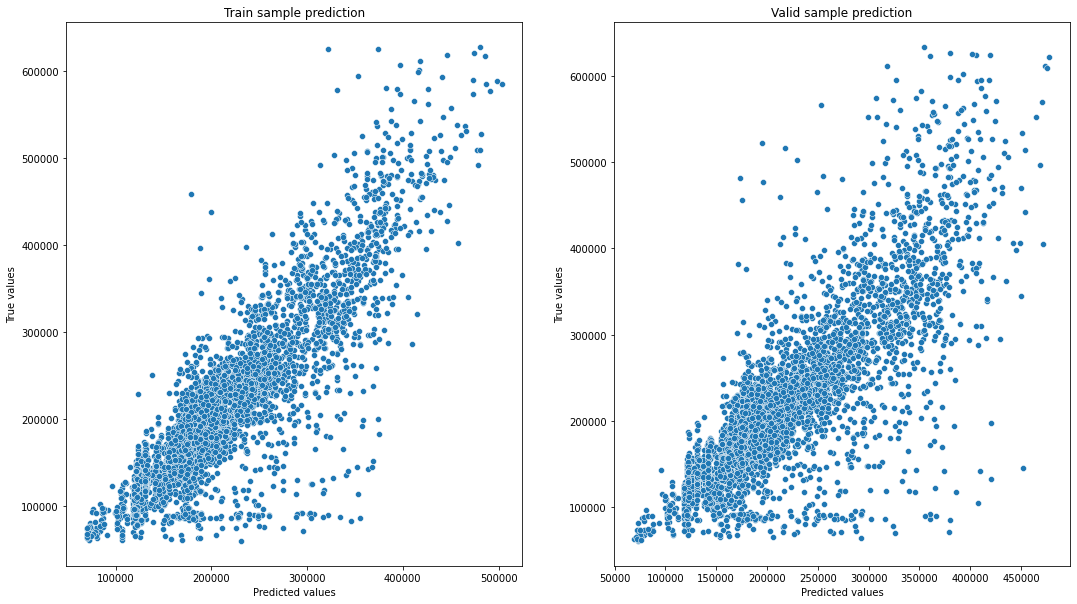

In [70]:
y_train_preds = rf.predict(X_train)
y_valid_preds = rf.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

In [71]:
y_train_preds

array([434147.24031148, 211151.73829534, 260753.82762175, ...,
       172408.74867036, 131117.73914953, 175113.4690156 ])

In [72]:
y_valid_preds

array([270552.46620026, 253785.36113337, 216300.79132268, ...,
       141835.13045022, 175729.83835608, 188220.6975887 ])

In [73]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_valid_preds)

0.6610999142479611

In [74]:
cv_score = cross_val_score(rf, X, y, scoring='r2', cv = KFold(n_splits=5, shuffle=True, random_state=42))
cv_score

array([0.70249916, 0.6424994 , 0.66351991, 0.67033731, 0.67132477])

In [75]:
cv_score.mean()

0.6700361099337272

In [76]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,Rooms,0.303766
1,Square,0.207970
2,Social_1,0.119425
3,Social_2,0.089928
5,KitchenSquare,0.066022
4,Social_3,0.049174
6,DistrictId,0.041973
7,Ecology_1,0.025308
12,Healthcare_1,0.024944
8,LifeSquare,0.019196


In [77]:
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
0,Rooms,0.303766
1,Square,0.207970
2,Social_1,0.119425
3,Social_2,0.089928
5,KitchenSquare,0.066022
4,Social_3,0.049174
6,DistrictId,0.041973
7,Ecology_1,0.025308
12,Healthcare_1,0.024944
8,LifeSquare,0.019196


In [78]:
# feature_importances.to_csv(REPORTS_FILE_PATH + 'feature_importances.cvs',index=False)

In [79]:
with open(MODEL_FILE_PATH, "wb") as file:
    pickle.dump(rf, file)

In [80]:
with open(MODEL_FILE_PATH, "rb") as file:
    g_model = pickle.load(file)
    
g_model

RandomForestRegressor(max_depth=7, max_features=1.0, n_estimators=1000)

In [84]:
TEST_r = pd.read_csv("test.csv", sep=";")
TEST_r

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,med_house_year,age_binary_cat
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,...,1,1,0,1,0,1,0,1,52,0
1,5925,62,1.0,52.568134,42.568134,10.0,7,17.0,2017,0.072158,...,0,0,1,0,0,1,0,1,5,1
2,960,27,2.0,59.463676,10.000000,9.0,19,19.0,1977,0.211401,...,0,1,0,1,0,1,0,1,45,0
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,...,0,0,0,1,0,1,0,1,57,0
4,746,74,1.0,53.837055,10.000000,1.0,8,17.0,1977,0.309479,...,0,6,0,1,0,1,0,1,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177520,30.339945,5.0,1,5.0,1962,0.069660,...,1,2,0,1,0,1,0,1,60,0
4996,16138,38,3.0,93.698120,29.118840,10.0,21,27.0,2018,0.060753,...,0,7,0,1,0,1,0,1,4,1
4997,3912,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,...,2,5,0,1,0,1,0,1,56,0
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,...,0,11,0,1,0,1,0,1,52,0


In [86]:
TEST_r[TEST_r.isna()].sum()

Id                0.0
DistrictId        0.0
Rooms             0.0
Square            0.0
LifeSquare        0.0
KitchenSquare     0.0
Floor             0.0
HouseFloor        0.0
HouseYear         0.0
Ecology_1         0.0
Social_1          0.0
Social_2          0.0
Social_3          0.0
Healthcare_1      0.0
Helthcare_2       0.0
Shops_1           0.0
Shops_2_A         0.0
Shops_2_B         0.0
Ecology_2_A       0.0
Ecology_2_B       0.0
Ecology_3_A       0.0
Ecology_3_B       0.0
med_house_year    0.0
age_binary_cat    0.0
dtype: float64

In [87]:
TEST_r[TEST_r.isnull()].sum()

Id                0.0
DistrictId        0.0
Rooms             0.0
Square            0.0
LifeSquare        0.0
KitchenSquare     0.0
Floor             0.0
HouseFloor        0.0
HouseYear         0.0
Ecology_1         0.0
Social_1          0.0
Social_2          0.0
Social_3          0.0
Healthcare_1      0.0
Helthcare_2       0.0
Shops_1           0.0
Shops_2_A         0.0
Shops_2_B         0.0
Ecology_2_A       0.0
Ecology_2_B       0.0
Ecology_3_A       0.0
Ecology_3_B       0.0
med_house_year    0.0
age_binary_cat    0.0
dtype: float64

In [88]:
feature_names = ["Rooms","Square","Social_1","Social_2", "Social_3","KitchenSquare","DistrictId", "Ecology_1","LifeSquare", "HouseYear",
    "HouseFloor","Floor", "Healthcare_1", "med_house_year","Shops_1","Helthcare_2"]

target_name = 'Price'

In [89]:
X = TEST_r[feature_names]

In [90]:
y_test_preds = g_model.predict(X)

In [91]:
y_test_preds 

array([164035.63102629, 126311.66684448, 157737.52907339, ...,
       161740.99602818, 174193.60542784, 245102.97564373])

In [94]:
TEST = pd.DataFrame(y_test_preds, columns = ["Price"])
TEST.set_index(TEST_r["Id"], inplace=True)
TEST.head()

,Price
Id,
4567,164035.631026
5925,126311.666844
960,157737.529073
3848,231897.296010
746,226472.911566


In [95]:
TEST.to_csv("Price_TEST.csv", sep=";", index=False)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_valid,y_test_preds)

In [96]:
cv_score = cross_val_score(rf, X, y_test_preds, scoring='r2', cv = KFold(n_splits=5, shuffle=True, random_state=42))
cv_score

array([0.96752382, 0.96543209, 0.95382281, 0.96938851, 0.96923042])

In [97]:
cv_score.mean()

0.9650795286084666